<a href="https://colab.research.google.com/github/Christer-L/T-mixer/blob/master/rheometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rheology lab class I
See last cell for initial implementation.

## I. Load data from Google Drive and set working directories.

In [1]:
%cd ..
# Load the Drive helper and mount
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
path = "content/drive/My Drive/IPGG/Rheology/TP2"
os.chdir(path)
os.getcwd()

# Set file paths and define repositories with image data
root=r'./'
folder=[r'solution_45water_55glycerol', r'solution_55water_45glycerol',
        r'solution_75water_25glycerol']
expected_viscosities = {'solution_45water_55glycerol': 7.04, 
                        'solution_55water_45glycerol': 4.25,
                        'solution_75water_25glycerol': 1.99}
depth_k = len(folder)

/
Mounted at /content/drive/


## II. Install and import dependencies

In [2]:
!pip install pynverse
!pip install dataframe_image


import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from scipy.optimize import curve_fit
from scipy.special import erf
from pynverse import inversefunc
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp36-none-any.whl size=6350 sha256=7fb7c5dcd464d7e2f5609223515fd148f83face38675db3932dc55c478617627
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse
     |████████████████████████████████| 1.3MB 6.9MB/s 
     |████████████████████████████████| 296kB 32.8MB/s 
     |████████████████████████████████| 143kB 33.0MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=ce37bb227405e03a003cb6cf26f801ad6ecaf29e97fde6c0923bf4d230127e7c
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


## III. Define error function

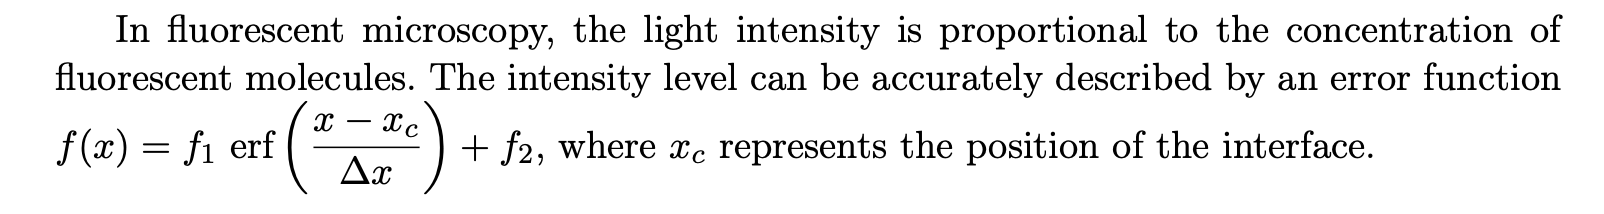

In [3]:
def error(x,A,B,xc,dx):
    return(A * erf((x - xc)/dx) + B)

## IV. Define function for viscosity measurement



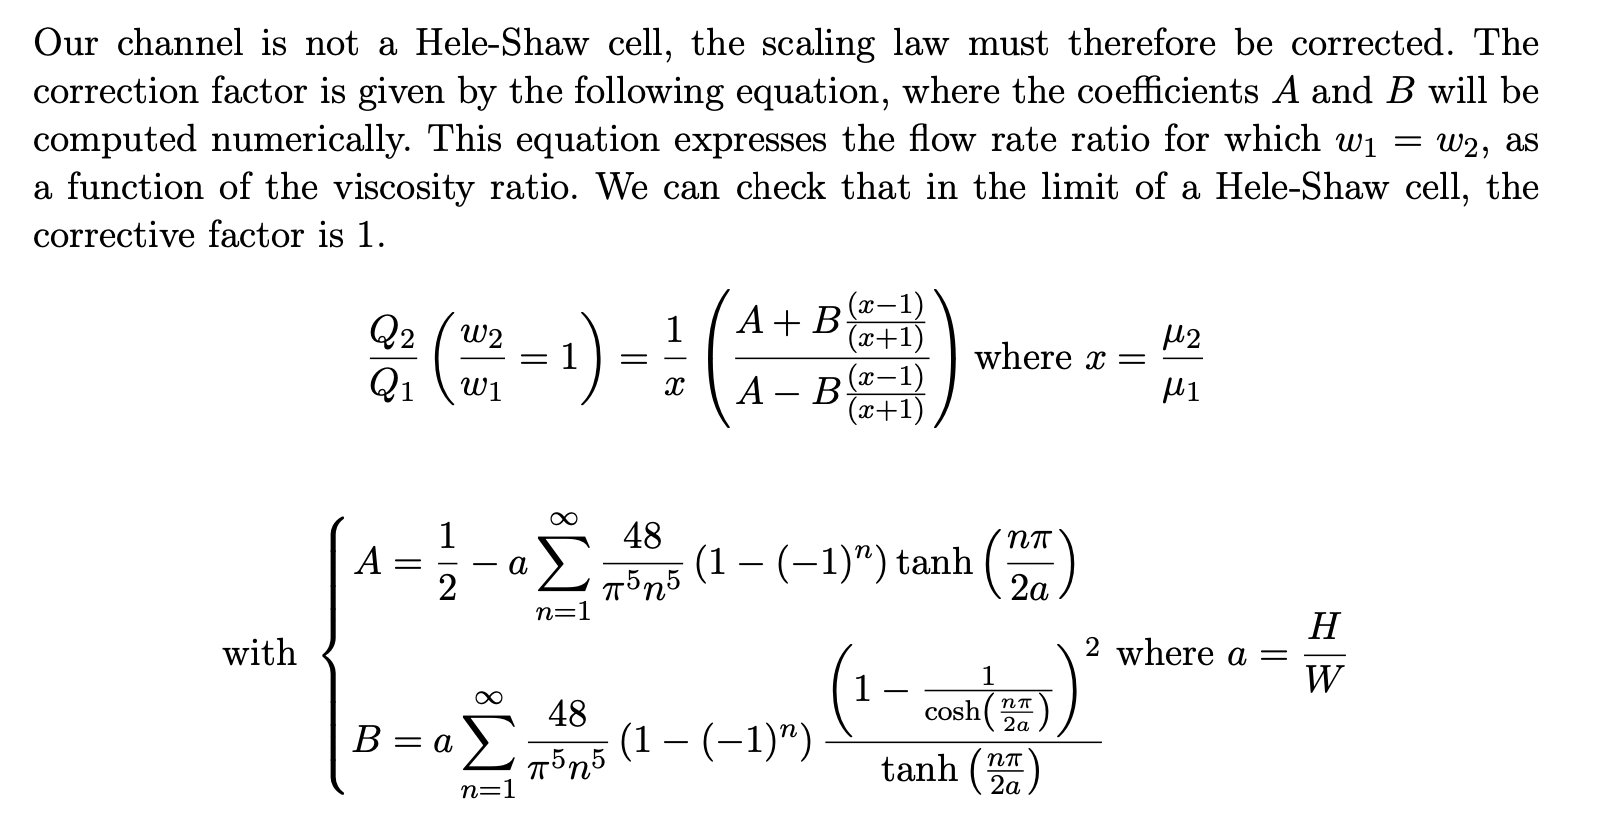

In [4]:
# Calculate flow rate ratio with viscosity as input
def f(mu):
  x = []
  y_a = []
  y_b =[]
  b = 0
  a = 0

  # H/W (Height to Width ratio)
  h2w = 1/1.1

  for n in range(1,100):
    x.append(n)
    b = b + (48/(np.pi**5 * n**5)) * (1-(-1)**n) * \
    ((1 - (1/np.cosh(n*np.pi / (2 * h2w))))**2 / np.tanh(n*np.pi / (2 * h2w)))
    a = a + (48/(np.pi**5 * n**5)) * (1-(-1)**n) * np.tanh(n*np.pi / (2 * h2w))
    A = 1/2 - h2w * a
    B = h2w * b
    y_a.append(a)
    y_b.append(a/b)
  return (1/mu) * ((A + B*((mu - 1)/(mu + 1))) / (A - B*((mu - 1)/(mu + 1))))

# Invert the function f and return viscosity at fixed flow rate ratio
def getViscosity(flowrate_ratio):
  if flowrate_ratio == 0.0:
    return "Illegal input"
  return inversefunc(f, y_values=flowrate_ratio, domain=[0.01, 100.0]).item(0)

## V. View data and plot graphs

>>>> solution_45water_55glycerol
Channel width in pixels: 358




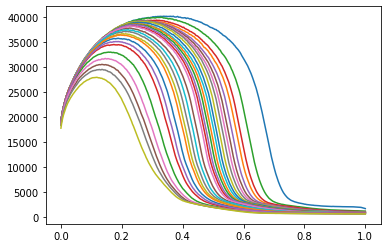

,Q(reference) [mPa.s],Q(test) [mPa.s],Q ratio,Interface position,Relative interface position,Width ratio,Fitting error (pixels),Relative fitting error
1,100.0,15.0,0.15,213.188188,0.595498,0.679268,0.443282,0.001238
2,100.0,18.0,0.18,204.564815,0.571410,0.750057,0.422633,0.001181
0,100.0,20.0,0.20,200.126737,0.559013,0.788866,0.410870,0.001148
3,100.0,22.0,0.22,195.068903,0.544885,0.835249,0.408826,0.001142
4,100.0,24.0,0.24,190.927430,0.533317,0.875058,0.390461,0.001091
5,100.0,26.0,0.26,187.517775,0.523793,0.909152,0.389454,0.001088
6,100.0,28.0,0.28,184.195054,0.514511,0.943592,0.380295,0.001062
7,100.0,30.0,0.30,180.650694,0.504611,0.981725,0.365445,0.001021
9,100.0,32.0,0.32,177.436689,0.495633,1.017621,0.360864,0.001008
8,100.0,34.0,0.34,174.643092,0.487830,1.049895,0.359311,0.001004


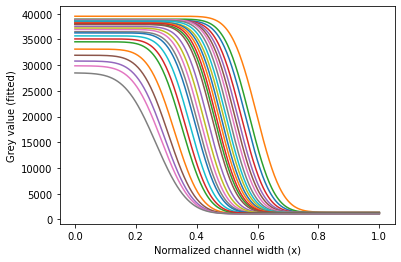

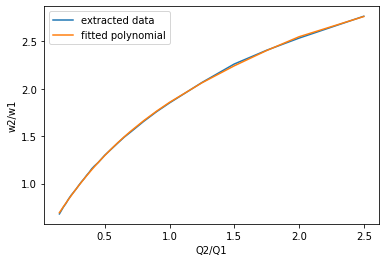

Warning count (removed curves): 1
Q2/Q1 (@ w2/w1 = 1) = 0.3117053652304132
Estimated viscosity: 8.457645807281253 mPa.s
Error: 20.14%


--------------------------------------------------
>>>> solution_55water_45glycerol
Channel width in pixels: 357




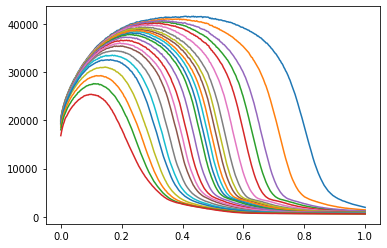

,Q(reference) [mPa.s],Q(test) [mPa.s],Q ratio,Interface position,Relative interface position,Width ratio,Fitting error (pixels),Relative fitting error
0,50.0,2.0,0.04,278.783299,0.780906,0.280565,0.545394,0.001528
1,50.0,5.0,0.10,247.640116,0.693670,0.441608,0.461702,0.001293
4,50.0,8.0,0.16,227.464797,0.637156,0.569474,0.423733,0.001187
2,50.0,10.0,0.20,217.129741,0.608207,0.644178,0.423884,0.001187
3,50.0,12.0,0.24,207.639603,0.581624,0.719325,0.397284,0.001113
6,50.0,15.0,0.30,195.861140,0.548631,0.822720,0.382114,0.001070
7,50.0,18.0,0.36,186.464721,0.522310,0.914571,0.373383,0.001046
8,50.0,20.0,0.40,180.465609,0.505506,0.978216,0.370504,0.001038
5,50.0,22.0,0.44,176.272156,0.493760,1.025277,0.363898,0.001019
11,50.0,24.0,0.48,171.241498,0.479668,1.084775,0.354097,0.000992


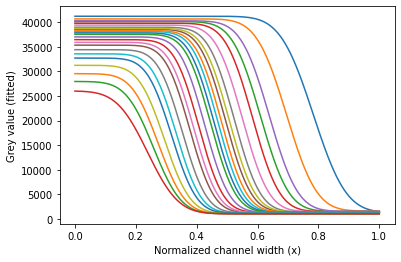

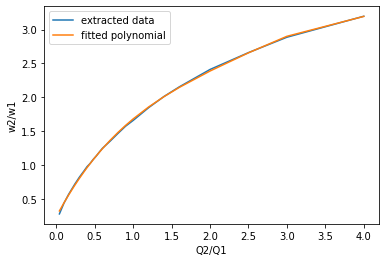

Warning count (removed curves): 0
Q2/Q1 (@ w2/w1 = 1) = 0.4241588084799692
Estimated viscosity: 5.403021744926721 mPa.s
Error: 27.13%


--------------------------------------------------
>>>> solution_75water_25glycerol
Channel width in pixels: 357




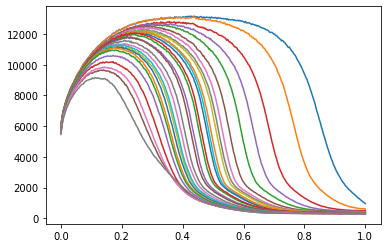

,Q(reference) [mPa.s],Q(test) [mPa.s],Q ratio,Interface position,Relative interface position,Width ratio,Fitting error (pixels),Relative fitting error
0,50.0,2.0,0.04,300.438637,0.841565,0.188263,0.590357,0.001654
1,50.0,5.0,0.10,267.652509,0.749727,0.333819,0.443850,0.001243
3,50.0,10.0,0.20,238.449439,0.667926,0.497173,0.419486,0.001175
4,50.0,15.0,0.30,220.388083,0.617334,0.619870,0.408136,0.001143
2,50.0,20.0,0.40,206.243417,0.577713,0.730964,0.404475,0.001133
5,50.0,25.0,0.50,192.793074,0.540037,0.851726,0.407185,0.001141
6,50.0,28.0,0.56,184.940047,0.518039,0.930355,0.401140,0.001124
7,50.0,30.0,0.60,180.714971,0.506204,0.975487,0.402731,0.001128
8,50.0,32.0,0.64,178.236989,0.499263,1.002951,0.395171,0.001107
11,50.0,35.0,0.70,172.247064,0.482485,1.072604,0.398025,0.001115


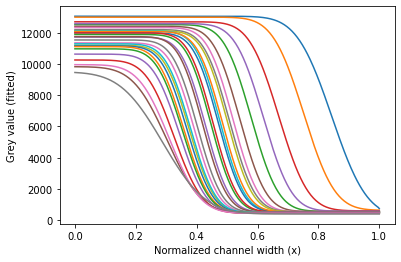

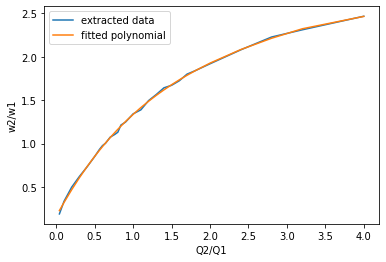

Warning count (removed curves): 0
Q2/Q1 (@ w2/w1 = 1) = 0.6340627733065947
Estimated viscosity: 2.6963000713722063 mPa.s
Error: 35.49%


--------------------------------------------------


In [7]:
# Iterate through repositories
for k in range(depth_k):
    path_k=root+folder[k]
    print(">>>> " + str(folder[k]))

    # Obtain resized images
    list_img=os.listdir(path_k+'/resized')
    depth_j=len(list_img)

    optimize_warnings_count = 0

     # Initiate lists for pandas and plots
    Q_ratios = []
    w_ratios = []
   
    Q_reference = []
    Q_test = []
    x_interface = []
    x_interface_relative = []
    xc_std_dev = []
    xc_std_dev_relative = []

    # Find the background image and get spatial parameters
    for j in range(depth_j):
        data_flow = list_img[j].split("_")
        if "background" in data_flow:
          path_current=path_k+'/resized/'+list_img[j]
          background = cv2.imread(path_current,-1)
          back_partial = background[:,1300:1350]
          line=np.mean(back_partial,axis=1)        
          line1 = line[:int(len(line)/2)]
          line2 = line[int(len(line)/2):]
          
          wall1 = np.where(line1==min(line1))[0][0]
          wall2 = np.where(line2==min(line2))[0][0] + int(len(line)/2)
          channel_width_in_px = wall2 - wall1
          print("Channel width in pixels: " + str(channel_width_in_px))
          print("\n")

    # Plot experimental results
    for j in range(depth_j):
        data_flow = list_img[j].split("_")
        if "background" in data_flow:
          continue
        # Opening the images and extracting a small portion 
        path_current=path_k+'/resized/'+list_img[j]
        img=cv2.imread(path_current,-1)
        img_partial = img[wall1:wall2,1300:1350]
        line=np.mean(img_partial,axis=1)
        line=np.array(line).astype('uint')
        x = np.linspace(0, 1, len(line))
        plt.plot(x, line)
    plt.show()

    # Iterate through each image
    for j in range(depth_j):
        # Get image information from filename
        data_flow = list_img[j].split("_")
        if "background" in data_flow:
          continue

        # Opening the images and extracting a small portion 
        path_current=path_k+'/resized/'+list_img[j]
        img=cv2.imread(path_current,-1)
        img_partial = img[wall1:wall2,1300:1350]
        
        # Extracting the grey level perpendicular to the channel direction
        line=np.mean(img_partial,axis=1)
        line=np.array(line).astype('uint')
        index = np.where(line==max(line))[0][0]
        plateu = np.linspace(max(line), max(line),index).astype('uint')
        line = np.concatenate([plateu, line[index:]])
        
        x = np.linspace(0, channel_width_in_px, 
                        channel_width_in_px).astype('uint')

        # Fitting the curve with the error function
        (A,B,xc,dx), pcov = curve_fit(error,x,line,p0=(5000,5000,index,channel_width_in_px), maxfev=10000)

        if xc < 0:
          optimize_warnings_count = optimize_warnings_count + 1
          # Dismiss curve if fitting failed
          continue

        y = error(x,A,B,xc,dx)
        normalized_x = np.linspace(0, 1, len(x))
        plt.plot(normalized_x, y, label="fitted")
        
        w_ratios.append((channel_width_in_px - xc) / xc)
        x_interface_relative.append(xc/channel_width_in_px)
        x_interface.append(xc)
        ratio = float(data_flow[2][6:]) / float(data_flow[1][5:])
        Q_ratios.append(ratio)
        Q_reference.append(float(data_flow[1][5:]))
        Q_test.append(float(data_flow[2][6:]))
        xc_std_dev.append(np.sqrt(np.diag(pcov))[3])
        xc_std_dev_relative.append(np.sqrt(np.diag(pcov))[3] / channel_width_in_px)
    
    # Show data
    d = {'Q(reference) [mPa.s]':Q_reference, 
            'Q(test) [mPa.s]':Q_test,
            'Q ratio': Q_ratios,
            'Interface position':x_interface, 
            'Relative interface position':x_interface_relative,
            'Width ratio':w_ratios,
            'Fitting error (pixels)':xc_std_dev,
            'Relative fitting error':xc_std_dev_relative
            }
            
    df = pd.DataFrame(data=d)
    df = df.sort_values(by=['Q ratio'])
    display(df)
    df.to_csv(str(folder[k]) + '.csv', index = False)

    # Show all curves on the same plot
    plt.xlabel("Normalized channel width (x)")
    plt.ylabel("Grey value (fitted)")
    plt.show()

    # Sort values by Q2/Q1
    zipped_list = zip(Q_ratios, w_ratios)
    x,y = zip(*sorted(zipped_list))
    plt.plot(x,y, label="extracted data")
    plt.xlabel("Q2/Q1")
    plt.ylabel("w2/w1")

    # Fit data to a polynomial
    x = np.array(x)
    y = np.array(y)
    y = np.round(y, 4)
    p = np.polyfit(x,y,4)
    poly = np.poly1d(p)
    plt.plot(x, poly(x), label="fitted polynomial")
    plt.legend(loc="upper left")
    plt.show()

    print("Warning count (removed curves): " + str(optimize_warnings_count))
    
    # Calculate Q2/Q1 value @ w2/w1. Y = AX + B --> X = (Y-B)/A --> X = (1-B)/A
    flowrate_ratio_at_1 = inversefunc(poly, y_values=1.0).item(0)
    print("Q2/Q1 (@ w2/w1 = 1) = " + str(flowrate_ratio_at_1))
    print("Estimated viscosity: " + str(getViscosity(flowrate_ratio_at_1)) + " mPa.s")
    real_measured_difference = abs(expected_viscosities[folder[k]] -     \
                                   getViscosity(flowrate_ratio_at_1)) /  \
                                   expected_viscosities[folder[k]]

    print("Error: " + str(round(real_measured_difference * 100, 2)) + "%")
    print('\n')
    print("-" * 50)

## Reference: Initial implementation

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 09:53:07 2020

@author: lucas
"""

import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import cv2

root=r'C:/Users/lucas/Documents/Cours/Rheologie_2020/TP_rheometer/'
folder=[r'solution_75water_25glycerol']
depth_k = len(folder)

def error(x,A,B,xc,dx):
    return(A * erf((xc-x)/dx) + B)

for k in range(depth_k):
    path_k=root+folder[k]
    
    list_img=os.listdir(path_k+'/resized')
    depth_j=len(list_img)-1
    
    for j in range(depth_j):
        j=j+1
        
        # Opening the images and extracting a small portion 
        path_current=path_k+'/resized/'+list_img[j]
        img=cv2.imread(path_current,-1)
        img_partial = img[:,1300:1350]
        data_flow = list_img[j].split("_")
        
        # Extracting the grey level perpendicular to the channel direction
        line=np.mean(img_partial,axis=1)
        index = np.where(line==max(line))[0][0]
        line = line[index:]
        x = np.linspace(0,len(line)-1,len(line)).astype('uint')
        
        # Fitting the curve with the error function
        (A,B,xc,dx), pcov = curve_fit(error,x,line,p0=(5000,5000,100,50))
        
        # plt.plot(x,error(x,A,B,xc,dx))
        # plt.plot(x,line)
        # print(xc)
        
    path_current=path_k+'/resized/'+list_img[0]
    background = cv2.imread(path_current,-1)
    back_partial = background[:,1300:1350]
    line=np.mean(back_partial,axis=1)
    
    line1 = line[:int(len(line)/2)]
    line2 = line[int(len(line)/2):]
    
    wall1 = np.where(line1==min(line1))[0][0]
    wall2 = np.where(line2==min(line2))[0][0] + int(len(line)/2)
    
    # plt.plot(line)
        
# plt.imshow(img_partial,'gray')